In [1]:
import gs
import numpy as np

In [2]:
import phenom

In [3]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Set font size for plotting
font = {'size':14}
plt.rc('font', **font)

In [4]:
import lalutils

In [5]:
M = 100
qlist = np.linspace(1, 10, 10)
chilist = np.linspace(-0.5, 0.5, 10)

In [6]:
# dim = 1
dim = 2

if dim ==1:
    params = []
    coords = []
    for q in qlist:
        m1, m2 = phenom.m1_m2_M_q(M, q)
        p = lalutils.gen_wf_params(m1=m1, m2=m2)
        f, hp, amp, phase = lalutils.gen_wf(p)
        d = {"M":M, "q":q, "f":f, "phase":phase}
        params.append(d)
        coords.append([q])

    coords = np.array(coords)
    x = f

elif dim == 2:

    params = []
    coords = []
    for q in qlist:
        m1, m2 = phenom.m1_m2_M_q(M, q)
        for chi in chilist:
            p = lalutils.gen_wf_params(m1=m1, m2=m2, S1z=chi)
            f, hp, amp, phase = lalutils.gen_wf(p)
            d = {"M":M, "q":q, "chi":chi, "f":f, "phase":phase}
            params.append(d)
            coords.append([q, chi])

    coords = np.array(coords)
    x = f

In [7]:
training = np.zeros(shape=(len(params), len(params[0]['f'])))

In [8]:
training.shape

(100, 370)

In [9]:
for i, pp in enumerate(params):
    training[i] = pp['phase']

In [10]:
int_range = [params[0]['f'][0], params[0]['f'][-1]]
int_num = len(params[0]['f'])

In [11]:
basis = gs.imgs(training, return_orthonormal=True)

In [12]:
gs.check_basis(basis)

error is 16.431676725154983
condition number is 1.0000000000000018


In [13]:
def compute_projection_coeffs(RB, ref_data):
    proj_coeffs = np.array([ np.dot(RB, ref_data[i]) for i in range(len(ref_data)) ] )
    return proj_coeffs

In [14]:
proj_coeffs = compute_projection_coeffs(basis, training)

In [15]:
proj_coeffs.shape

(100, 100)

In [16]:
coords.shape

(100, 2)

In [17]:
def compute_greedy_error(basis, training, x):
    """
    representation error
    """
    
    proj_coeffs = compute_projection_coeffs(basis, training)
    for i in range(len(training)):
#     for i in [0]:
        
        rep = np.dot(proj_coeffs[i], basis)
        
        err=np.sqrt(np.sum((training[i] - rep)**2))
        print(err)


In [18]:
compute_greedy_error(basis, training, x)

3.5797419414323114e-14
6.675940080217793e-14
4.9926471426275145e-14
5.078818341508804e-14
5.231978275058637e-14
5.815248159119603e-14
6.359019834938834e-14
5.767103701145474e-14
7.404821374692313e-14
1.0093197436076755e-13
2.985246336435187e-14
3.7846231130723177e-14
4.3297701594920745e-14
4.9683565753691055e-14
6.01949778046841e-14
1.2242755045584696e-13
9.39385150235787e-14
1.141350847921543e-13
1.6437615819746413e-13
1.0914751566307598e-13
2.5594480586600733e-14
3.526502572646073e-14
3.890662500790796e-14
5.029543124391025e-14
6.992686641745135e-14
7.804670452541347e-14
1.1652201878871774e-13
1.2335976745167254e-13
1.3011302302345487e-13
1.64691398053433e-13
3.08261703477493e-14
2.881961413091669e-14
3.668258190248316e-14
5.781821509951484e-14
7.340681802220419e-14
8.488154209580226e-14
1.4306670077171637e-13
1.4265013663024865e-13
1.520660281916044e-13
1.9507500003180571e-13
2.8728457948815354e-14
3.1184479901155224e-14
4.104343015992808e-14
6.477387846988247e-14
8.464909994297241e

In [19]:
if dim == 1:
    plt.figure()
    plt.plot(coords, proj_coeffs[:,0])
    plt.scatter(coords, proj_coeffs[:,0])

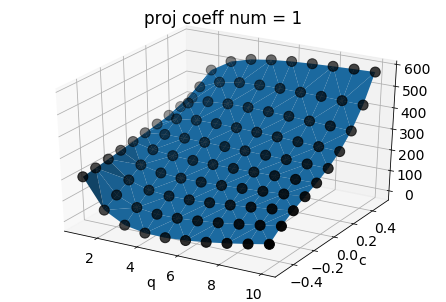

In [20]:
if dim == 2:
    # for i in range(basis_size):
    for i in [0]:
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.plot_trisurf(coords[:,0], coords[:,1], proj_coeffs[:,i])
        ax.scatter(coords[:,0], coords[:,1], proj_coeffs[:,i], s=100, c='k')
        ax.set_xlabel('q')
        ax.set_ylabel('c')
        ax.set_title('proj coeff num = {0}'.format(i+1))

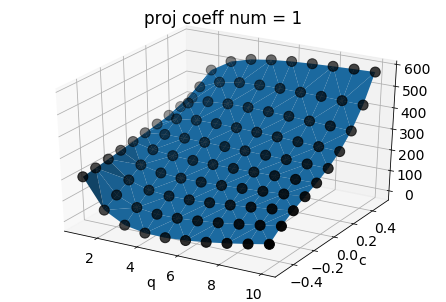

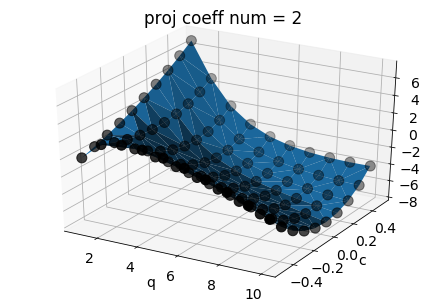

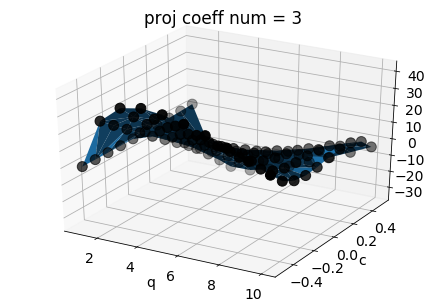

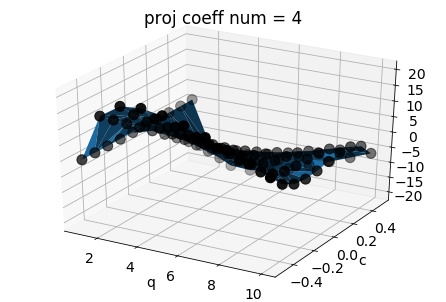

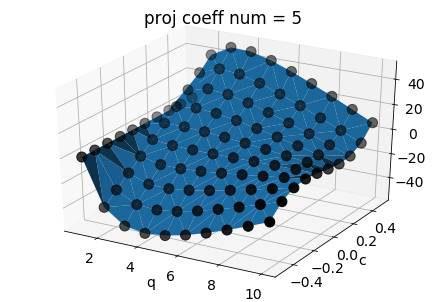

In [29]:
if dim == 2:
    # for i in range(basis_size):
    for i in range(5):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.plot_trisurf(coords[:,0], coords[:,1], proj_coeffs[:,i])
        ax.scatter(coords[:,0], coords[:,1], proj_coeffs[:,i], s=100, c='k')
        ax.set_xlabel('q')
        ax.set_ylabel('c')
        ax.set_title('proj coeff num = {0}'.format(i+1))